In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the dataset

In [77]:
dataset = pd.read_csv('/Users/aatrayee/Downloads/features-phishing.csv').fillna(0)
da = pd.read_csv('/Users/aatrayee/Downloads/Phishing.csv').fillna(0)
da.shape

(11055, 31)

In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer

category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['@ in URLs'])
dataset['@ in URLs'] = category_labels



In [43]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['Encoding'])
dataset['Encoding'] = category_labels

In [44]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['Flash content'])
dataset['Flash content'] = category_labels

In [45]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['HTML content'])
dataset['HTML content'] = category_labels

In [46]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['Html Form'])
dataset['Html Form'] = category_labels

In [47]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['Html iFrame'])
dataset['Html iFrame'] = category_labels

In [48]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['IPs in URLs'])
dataset['IPs in URLs'] = category_labels

In [49]:
category_le = LabelEncoder()
category_labels = category_le.fit_transform(dataset['Phishy'])
dataset['Phishy'] = category_labels

In [50]:
da.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [51]:
#y = dataset["Result"]
#X = dataset.drop(['Result','Css','Flash content','Phishy'], axis=1)
y = da["Result"]
X = da.drop(["Result"], axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.ndim 

2

In [53]:
X_train.shape

(7738, 30)

In [54]:
X_test.shape

(3317, 30)

In [55]:
#Performing SVM on train data
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf = clf.fit(X_train, y_train)
predictionsSVM = clf.predict(X_test)
scoreSVM = clf.score(X_test, y_test)
print(scoreSVM)

0.9273439855290926


In [56]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train1.shape

(7738, 30, 1)

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [58]:
regressor = Sequential()

regressor.add(LSTM(units = 2, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 2, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 2, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 2))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


ValueError: in user code:

    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 30)


In [59]:
da.shape

(11055, 31)

In [60]:

from collections import Counter

classes = Counter(da['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [61]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


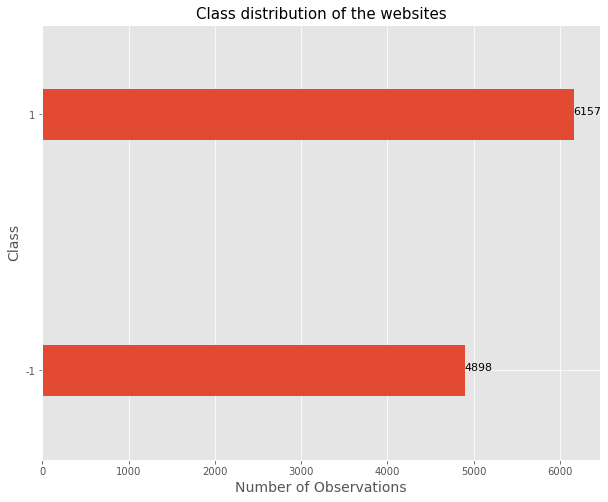

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

In [63]:
da.rename(columns={'Result': 'Class'}, inplace=True)

da['Class'] = da['Class'].map({-1:0, 1:1})
da['Class'].unique()

array([0, 1])

In [64]:
da.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

In [66]:
from sklearn.model_selection import train_test_split

X = da.iloc[:,0:30].values.astype(int)
y = da.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [67]:

from sklearn.linear_model import LogisticRegression

clf = svm.SVC(kernel='linear') # Linear Kernel
clf = clf.fit(X_train, y_train)

In [68]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

In [69]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

NameError: name 'logreg' is not defined

In [70]:

# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

In [71]:
# Model building using the Sequential API
model = Sequential()

model.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [72]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [73]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [74]:
history = model.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
139/139 [==============================] - 0s 941us/step - loss: 0.5760 - accuracy: 0.7753
Epoch 2/128
139/139 [==============================] - 0s 977us/step - loss: 0.2105 - accuracy: 0.9180
Epoch 3/128
139/139 [==============================] - 0s 996us/step - loss: 0.1963 - accuracy: 0.9230
Epoch 4/128
139/139 [==============================] - 0s 936us/step - loss: 0.1926 - accuracy: 0.9244
Epoch 5/128
139/139 [==============================] - 0s 973us/step - loss: 0.1912 - accuracy: 0.9270
Epoch 6/128
139/139 [==============================] - 0s 933us/step - loss: 0.1920 - accuracy: 0.9239
Epoch 7/128
139/139 [==============================] - 0s 991us/step - loss: 0.1968 - accuracy: 0.9204
Epoch 8/128
139/139 [==============================] - 0s 915us/step - loss: 0.1852 - accuracy: 0.9270
Epoch 9/128
139/139 [==============================] - 0s 953us/step - loss: 0.1727 - accuracy: 0.9319
Epoch 10/128
139/139 [==============================] - 0s 964us/step - l

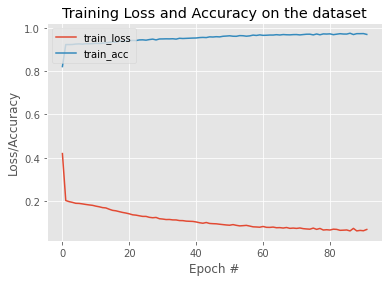

In [70]:
N = 92

plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [71]:
# Building the model with the same topology as specified in the above-mentioned paper

model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=30))
model_TDLHBA.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [72]:
history_TDLHBA = model_TDLHBA.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
885/885 [==============================] - 1s 888us/step - loss: 0.3147 - accuracy: 0.8730
Epoch 2/100
885/885 [==============================] - 1s 855us/step - loss: 0.1839 - accuracy: 0.9248
Epoch 3/100
885/885 [==============================] - 1s 866us/step - loss: 0.1666 - accuracy: 0.9319
Epoch 4/100
885/885 [==============================] - 1s 958us/step - loss: 0.1417 - accuracy: 0.94400s - loss: 0
Epoch 5/100
885/885 [==============================] - 1s 1ms/step - loss: 0.1370 - accuracy: 0.9432
Epoch 6/100
885/885 [==============================] - 1s 887us/step - loss: 0.1257 - accuracy: 0.9445
Epoch 7/100
885/885 [==============================] - 1s 882us/step - loss: 0.1106 - accuracy: 0.9530
Epoch 8/100
885/885 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.9559
Epoch 9/100
885/885 [==============================] - 1s 877us/step - loss: 0.1024 - accuracy: 0.9576
Epoch 10/100
885/885 [==============================] - 1s 767us/

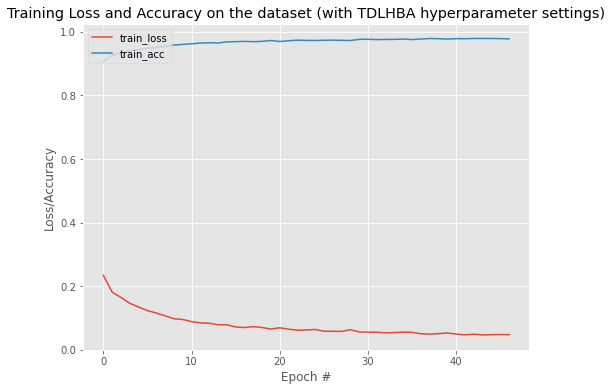

In [77]:

N = 47

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_TDLHBA.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_TDLHBA.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [102]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

hist1 = regressor.fit(X_train1, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
277/277 [==============================] - 14s 32ms/step - loss: 0.2345 - accuracy: 0.6357
Epoch 2/100
277/277 [==============================] - 10s 36ms/step - loss: 0.1346 - accuracy: 0.8226
Epoch 3/100
277/277 [==============================] - 11s 41ms/step - loss: 0.1107 - accuracy: 0.8537
Epoch 4/100
277/277 [==============================] - 14s 51ms/step - loss: 0.1045 - accuracy: 0.8610
Epoch 5/100
277/277 [==============================] - 12s 43ms/step - loss: 0.0970 - accuracy: 0.8726
Epoch 6/100
277/277 [==============================] - 15s 53ms/step - loss: 0.0936 - accuracy: 0.8748
Epoch 7/100
277/277 [==============================] - 14s 49ms/step - loss: 0.0956 - accuracy: 0.8785
Epoch 8/100
277/277 [==============================] - 17s 60ms/step - loss: 0.0884 - accuracy: 0.8814
Epoch 9/100
277/277 [==============================] - 16s 57ms/step - loss: 0.0810 - accuracy: 0.8954
Epoch 10/100
277/277 [==============================] - 18s 66ms/step - l

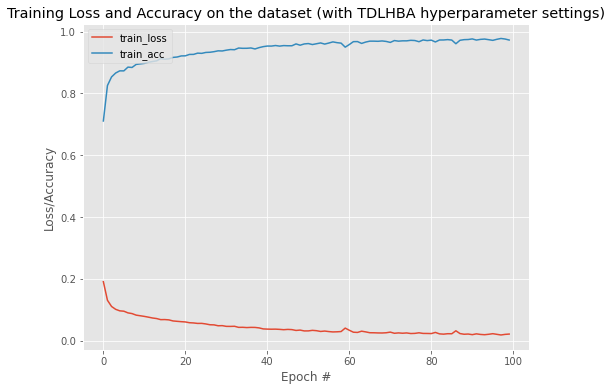

In [104]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist1.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [166]:

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_text = regressor.predict(X_test)

pp = []
for i in (pred_text):
    if i > 0.5:
        pp.append(1)
    else:
        pp.append(0)
print(pp)

[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [167]:
scores1 = regressor.evaluate(X_test, y_test)
print(scores1)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores1[1]*100))
#loss, accuracy, f1_score, precision, recall = regressor.evaluate((X_test, y_test), verbose=0)
print('\loss score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores1[0]*100))
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

y_pred_bool = np.argmax(pred_text, axis=1)
print(classification_report(y_testm, pp))
# Print f1, precision, and recall scores
print(precision_score(y_test, pred_text , average="macro"))
print(recall_score(y_test, pred_text , average="macro"))
print(f1_score(y_test, pred_text , average="macro"))

70/70 [==============================] - 1s 11ms/step - loss: 0.0321 - accuracy: 0.9584
[0.032082654535770416, 0.9583898782730103]

Accuracy score of the Neural Network with basic hyperparameter settings 95.84%
\loss score of the Neural Network with basic hyperparameter settings 3.21%
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       974
           1       0.95      0.97      0.96      1237

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [159]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
predicted = np.argmax(pred_text, axis=0.5)
print(predicted)

#classes = pred_text.argmax(axis=-1)
#print(pred_text)

#le_en = LabelEncoder()
#le_en.fit(['Phishing Websites', 'Normal Websites']
#LabelEncoder()
#list(le_en.classes_)
#ans = list(le_en.inverse_transform(classes))

#print(classification_report(classes, y_test))

TypeError: 'float' object cannot be interpreted as an integer

In [114]:
import keras

regressor1 = Sequential()

regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.2))

regressor1.add(Dense(units = 1))
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

regressor1.compile(optimizer = opt, loss = 'mean_squared_error',metrics=['accuracy'])

hist2 = regressor1.fit(X_train1, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
277/277 [==============================] - 19s 44ms/step - loss: 0.2648 - accuracy: 0.6081
Epoch 2/100
277/277 [==============================] - 13s 47ms/step - loss: 0.2003 - accuracy: 0.6688
Epoch 3/100
277/277 [==============================] - 15s 56ms/step - loss: 0.1951 - accuracy: 0.6887
Epoch 4/100
277/277 [==============================] - 18s 66ms/step - loss: 0.1885 - accuracy: 0.7119
Epoch 5/100
277/277 [==============================] - 20s 72ms/step - loss: 0.1791 - accuracy: 0.7368
Epoch 6/100
277/277 [==============================] - 17s 60ms/step - loss: 0.1684 - accuracy: 0.7616
Epoch 7/100
277/277 [==============================] - 17s 62ms/step - loss: 0.1613 - accuracy: 0.7675
Epoch 8/100
277/277 [==============================] - 18s 66ms/step - loss: 0.1571 - accuracy: 0.7766
Epoch 9/100
277/277 [==============================] - 17s 60ms/step - loss: 0.1467 - accuracy: 0.8010
Epoch 10/100
277/277 [==============================] - 15s 55ms/step - l

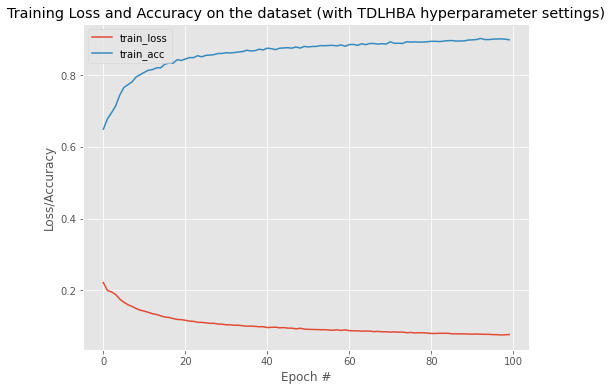

In [139]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist2.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
pred_text = regressor1.predict(X_test)

In [141]:
scores = regressor1.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
loss1, accuracy1, f1_score1, precision1, recall1 = regressor1.evaluate((X_test, y_test), verbose=0)

70/70 [==============================] - 3s 8ms/step - loss: 0.0660 - accuracy: 0.9109

Accuracy score of the Neural Network with basic hyperparameter settings 91.09%


ValueError: in user code:

    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:204 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_29 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 30, 1) dtype=int64>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]


In [125]:
opt = keras.optimizers.Adagrad()
regressor2 = Sequential()

regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

regressor2.add(Dense(units = 1))

regressor2.compile(optimizer = opt, loss = 'mean_squared_error',metrics=['accuracy'])

hist3 = regressor2.fit(X_train1, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
277/277 [==============================] - 16s 36ms/step - loss: 0.3475 - accuracy: 0.4868
Epoch 2/100
277/277 [==============================] - 16s 58ms/step - loss: 0.2241 - accuracy: 0.6117
Epoch 3/100
277/277 [==============================] - 14s 49ms/step - loss: 0.2185 - accuracy: 0.6118
Epoch 4/100
277/277 [==============================] - 15s 55ms/step - loss: 0.2168 - accuracy: 0.6108
Epoch 5/100
277/277 [==============================] - 15s 53ms/step - loss: 0.2136 - accuracy: 0.6217
Epoch 6/100
277/277 [==============================] - 13s 48ms/step - loss: 0.2108 - accuracy: 0.6342
Epoch 7/100
277/277 [==============================] - 13s 45ms/step - loss: 0.2117 - accuracy: 0.6348
Epoch 8/100
277/277 [==============================] - 13s 48ms/step - loss: 0.2111 - accuracy: 0.6299
Epoch 9/100
277/277 [==============================] - 15s 55ms/step - loss: 0.2134 - accuracy: 0.6209
Epoch 10/100
277/277 [==============================] - 15s 54ms/step - l

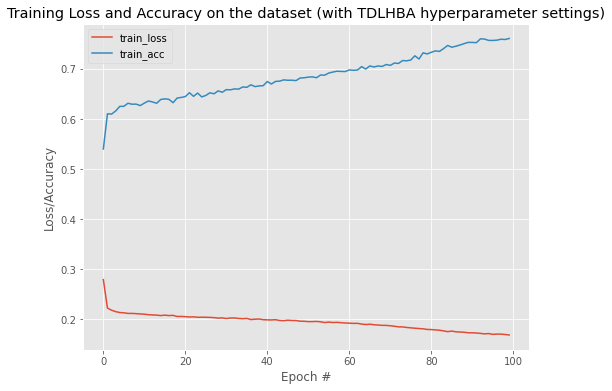

In [142]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist3.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist3.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [143]:
scores = regressor2.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
loss2, accuracy2, f1_score2, precision2, recall2 = regressor2.evaluate((X_test, y_test), verbose=0)

70/70 [==============================] - 3s 9ms/step - loss: 0.1626 - accuracy: 0.7725

Accuracy score of the Neural Network with basic hyperparameter settings 77.25%


ValueError: in user code:

    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/aatrayee/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:204 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_30 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 30, 1) dtype=int64>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>]


In [126]:
regressor3 = Sequential()

regressor3.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 30, return_sequences = True))


regressor3.add(LSTM(units = 20, return_sequences = True))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 10))


regressor3.add(Dense(units = 1))

regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

hist4 = regressor3.fit(X_train1, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
277/277 [==============================] - 19s 41ms/step - loss: 0.2245 - accuracy: 0.6439
Epoch 2/100
277/277 [==============================] - 15s 54ms/step - loss: 0.1353 - accuracy: 0.8116
Epoch 3/100
277/277 [==============================] - 15s 54ms/step - loss: 0.1083 - accuracy: 0.8560
Epoch 4/100
277/277 [==============================] - 13s 48ms/step - loss: 0.1012 - accuracy: 0.8619
Epoch 5/100
277/277 [==============================] - 14s 49ms/step - loss: 0.0957 - accuracy: 0.8751
Epoch 6/100
277/277 [==============================] - 14s 51ms/step - loss: 0.0907 - accuracy: 0.8795
Epoch 7/100
277/277 [==============================] - 16s 58ms/step - loss: 0.0879 - accuracy: 0.8811
Epoch 8/100
277/277 [==============================] - 17s 60ms/step - loss: 0.0882 - accuracy: 0.8792
Epoch 9/100
277/277 [==============================] - 14s 49ms/step - loss: 0.0831 - accuracy: 0.8907
Epoch 10/100
277/277 [==============================] - 17s 62ms/step - l

In [ ]:
N = 47

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist4.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist4.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [144]:
scores = regressor3.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
#loss3, accuracy3, f1_score3, precision3, recall3 = regressor3.evaluate(X_test, y_test), verbose=0)

70/70 [==============================] - 3s 7ms/step - loss: 0.0342 - accuracy: 0.9570

Accuracy score of the Neural Network with basic hyperparameter settings 95.70%


In [127]:
regressor5 = Sequential()

regressor5.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor5.add(Dropout(0.2))

regressor5.add(LSTM(units = 30, return_sequences = True))


regressor5.add(LSTM(units = 20, return_sequences = True))
regressor5.add(Dropout(0.2))

regressor5.add(LSTM(units = 10))


regressor5.add(Dense(units = 1))

regressor5.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

hist5 = regressor5.fit(X_train1, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
277/277 [==============================] - 35s 68ms/step - loss: 0.2260 - accuracy: 0.6412
Epoch 2/50
277/277 [==============================] - 16s 58ms/step - loss: 0.1393 - accuracy: 0.8044
Epoch 3/50
277/277 [==============================] - 20s 72ms/step - loss: 0.1108 - accuracy: 0.8510
Epoch 4/50
277/277 [==============================] - 18s 64ms/step - loss: 0.1015 - accuracy: 0.8610
Epoch 5/50
277/277 [==============================] - 18s 65ms/step - loss: 0.0969 - accuracy: 0.8675
Epoch 6/50
277/277 [==============================] - 19s 67ms/step - loss: 0.0887 - accuracy: 0.8820
Epoch 7/50
277/277 [==============================] - 18s 63ms/step - loss: 0.0893 - accuracy: 0.8810
Epoch 8/50
277/277 [==============================] - 18s 66ms/step - loss: 0.0815 - accuracy: 0.8876
Epoch 9/50
277/277 [==============================] - 19s 68ms/step - loss: 0.0805 - accuracy: 0.8923
Epoch 10/50
277/277 [==============================] - 16s 58ms/step - loss: 0.080

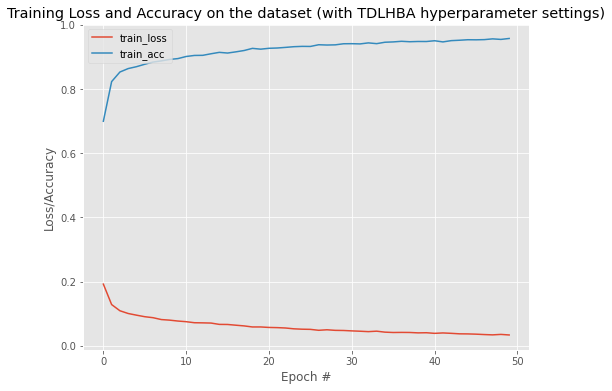

In [146]:
N = 50

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist5.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist5.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [148]:
scores = regressor5.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
#loss4, accuracy4, f1_score4, precision4, recall4 = regressor5.evaluate(X_test, y_test), verbose=0)

70/70 [==============================] - 2s 8ms/step - loss: 0.0399 - accuracy: 0.9471

Accuracy score of the Neural Network with basic hyperparameter settings 94.71%


In [128]:
regressor6 = Sequential()

regressor6.add(LSTM(units = 40, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor6.add(Dropout(0.2))

regressor6.add(LSTM(units = 30, return_sequences = True))


regressor6.add(LSTM(units = 20, return_sequences = True))
regressor6.add(Dropout(0.2))

regressor6.add(LSTM(units = 10))


regressor6.add(Dense(units = 1))

regressor6.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

hist6 = regressor6.fit(X_train1, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
277/277 [==============================] - 39s 75ms/step - loss: 0.2527 - accuracy: 0.5994
Epoch 2/10
277/277 [==============================] - 18s 66ms/step - loss: 0.1502 - accuracy: 0.7886
Epoch 3/10
277/277 [==============================] - 28s 100ms/step - loss: 0.1240 - accuracy: 0.8286
Epoch 4/10
277/277 [==============================] - 21s 77ms/step - loss: 0.1090 - accuracy: 0.8510
Epoch 5/10
277/277 [==============================] - 17s 60ms/step - loss: 0.0964 - accuracy: 0.8697
Epoch 6/10
277/277 [==============================] - 16s 57ms/step - loss: 0.0968 - accuracy: 0.8683
Epoch 7/10
277/277 [==============================] - 16s 57ms/step - loss: 0.0918 - accuracy: 0.8775
Epoch 8/10
277/277 [==============================] - 16s 59ms/step - loss: 0.0926 - accuracy: 0.8771
Epoch 9/10
277/277 [==============================] - 17s 62ms/step - loss: 0.0856 - accuracy: 0.8842
Epoch 10/10
277/277 [==============================] - 17s 62ms/step - loss: 0.08

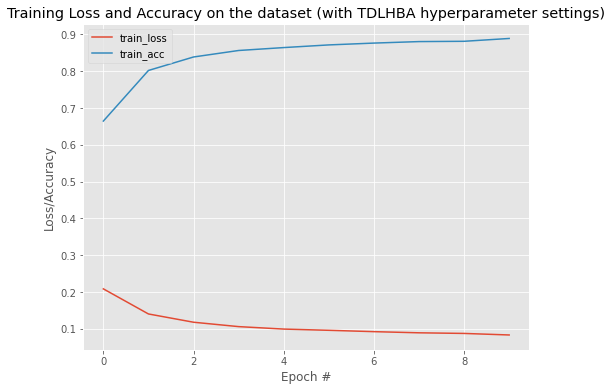

In [149]:
N = 10

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist6.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist6.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [150]:
scores = regressor6.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
#loss5, accuracy5, f1_score5, precision5, recall5 = regressor6.evaluate(X_test, y_test), verbose=0)

70/70 [==============================] - 2s 7ms/step - loss: 0.0704 - accuracy: 0.9005

Accuracy score of the Neural Network with basic hyperparameter settings 90.05%


In [160]:

regressor7 = Sequential()

regressor7.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
regressor7.add(Dropout(0.2))

regressor7.add(LSTM(units = 50, return_sequences = True))
regressor7.add(Dropout(0.2))

regressor7.add(LSTM(units = 50, return_sequences = True))
regressor7.add(Dropout(0.2))

regressor7.add(LSTM(units = 50))
regressor7.add(Dropout(0.2))

regressor7.add(Dense(2, activation='softmax'))

regressor7.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

hist7 = regressor7.fit(X_train1, y_train, epochs = 100,batch_size = 128)

Epoch 1/100
70/70 [==============================] - 13s 101ms/step - loss: 0.2500 - accuracy: 0.5020
Epoch 2/100
70/70 [==============================] - 7s 102ms/step - loss: 0.2500 - accuracy: 0.4786
Epoch 3/100
70/70 [==============================] - 8s 109ms/step - loss: 0.2500 - accuracy: 0.4988
Epoch 4/100
70/70 [==============================] - 8s 113ms/step - loss: 0.2500 - accuracy: 0.4949
Epoch 5/100
70/70 [==============================] - 8s 112ms/step - loss: 0.2500 - accuracy: 0.5042
Epoch 6/100
70/70 [==============================] - 8s 117ms/step - loss: 0.2500 - accuracy: 0.5134
Epoch 7/100
70/70 [==============================] - 7s 103ms/step - loss: 0.2500 - accuracy: 0.4847
Epoch 8/100
70/70 [==============================] - 7s 101ms/step - loss: 0.2500 - accuracy: 0.4960
Epoch 9/100
70/70 [==============================] - 11s 152ms/step - loss: 0.2500 - accuracy: 0.4865
Epoch 10/100
70/70 [==============================] - 9s 133ms/step - loss: 0.2500 - accu

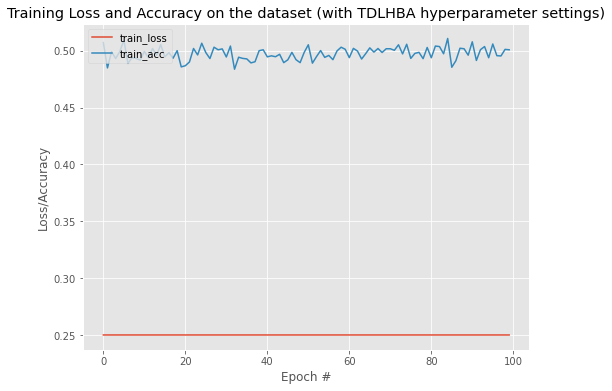

In [163]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist7.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist7.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
scores = regressor7.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
loss5, accuracy5, f1_score5, precision5, recall5 = regressor7.evaluate(X_test, y_test), verbose=0)

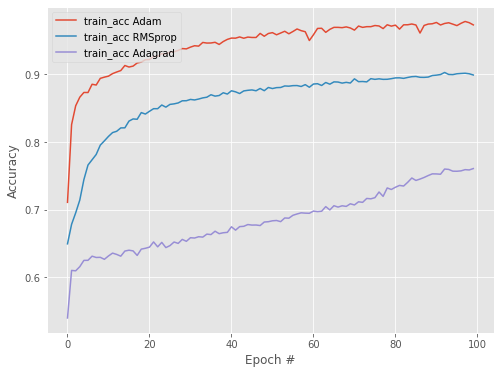

In [169]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), hist1.history["accuracy"], label="train_acc Adam")
plt.plot(np.arange(0, N), hist2.history["accuracy"], label="train_acc RMSprop")
plt.plot(np.arange(0, N), hist3.history["accuracy"], label="train_acc Adagrad")



plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.show()